(5000, 2)
(5000,)


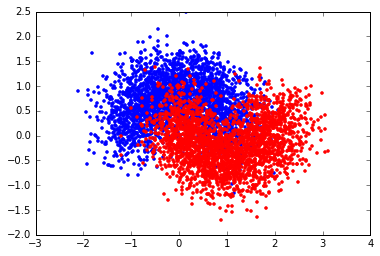

In [10]:
from sklearn import datasets
from polyssifier import poly, plot
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

%matplotlib inline
data, label = make_moons(n_samples=5000, noise=0.4)
print(data.shape)
print(label.shape)

label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]

plt.plot(data[label0,0], data[label0,1],'.');
plt.plot(data[label1,0], data[label1,1],'r.');

In [11]:
%rm -rf _models
scores, confusions, predictions = poly(data,label, n_folds=8, verbose=1, feature_selection=False, scoring='f1', concurrency=4)

INFO:polyssifier.polyssifier:Building classifiers ...
INFO:polyssifier.polyssifier:Initialization, done.
INFO:polyssifier.polyssifier:Nearest Neighbors          4:  Train 0.88/ Test 0.85, 0.17 sec
INFO:polyssifier.polyssifier:Nearest Neighbors          0:  Train 0.88/ Test 0.85, 0.23 sec
INFO:polyssifier.polyssifier:Multilayer Perceptron      0:  Train 0.87/ Test 0.88, 23.33 sec
INFO:polyssifier.polyssifier:Multilayer Perceptron      4:  Train 0.88/ Test 0.84, 28.75 sec
INFO:polyssifier.polyssifier:Nearest Neighbors          5:  Train 0.87/ Test 0.89, 0.14 sec
INFO:polyssifier.polyssifier:Nearest Neighbors          1:  Train 0.88/ Test 0.87, 0.22 sec
INFO:polyssifier.polyssifier:Multilayer Perceptron      1:  Train 0.88/ Test 0.87, 23.47 sec
INFO:polyssifier.polyssifier:Multilayer Perceptron      5:  Train 0.87/ Test 0.90, 46.69 sec
INFO:polyssifier.polyssifier:Nearest Neighbors          6:  Train 0.87/ Test 0.87, 0.14 sec
INFO:polyssifier.polyssifier:Nearest Neighbors          2:  Tra

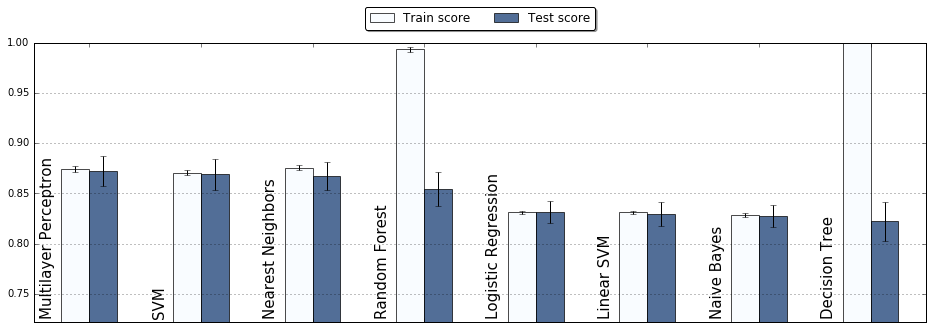

In [12]:
plot(scores)

In [13]:
for key, val in confusions.items():
    print(key)
    print(val)

Logistic Regression
[[ 2074.   426.]
 [  418.  2082.]]
Naive Bayes
[[ 2067.   433.]
 [  429.  2071.]]
Decision Tree
[[ 2055.   445.]
 [  445.  2055.]]
Random Forest
[[ 2148.   352.]
 [  371.  2129.]]
Nearest Neighbors
[[ 2193.   307.]
 [  350.  2150.]]
Linear SVM
[[ 2071.   429.]
 [  423.  2077.]]
SVM
[[ 2169.   331.]
 [  325.  2175.]]
Multilayer Perceptron
[[ 2178.   322.]
 [  317.  2183.]]


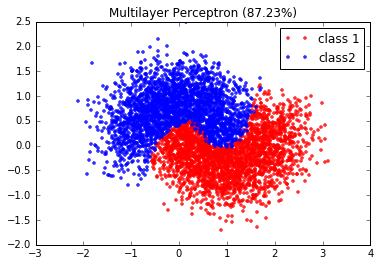

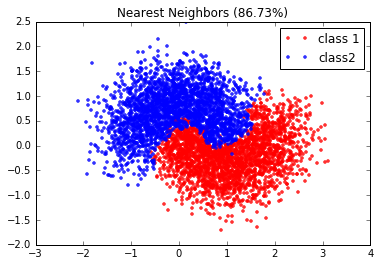

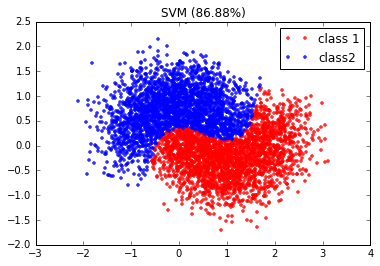

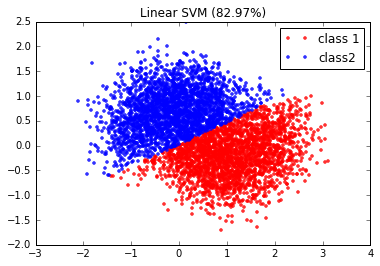

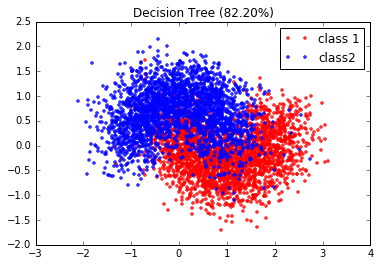

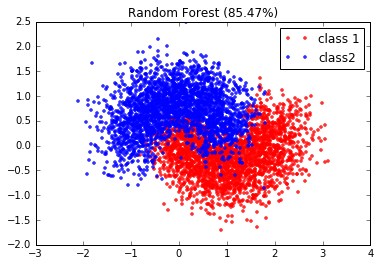

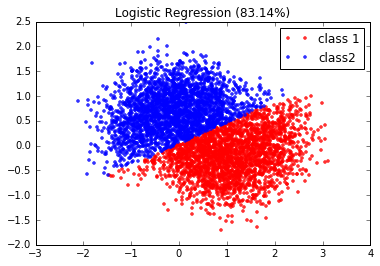

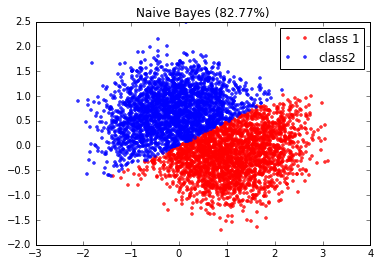

In [14]:
for key, pred in predictions.items():
    plt.figure()
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(scores[key]['test']) ))